In [1]:
import pandas as pd
import numpy as np

In [2]:
preprocessed_train = pd.read_csv('preprocessed_train.csv')

In [22]:
preprocessed_train.head(2)

,index,Id,Popularity,Page content,data-channel,title,raw_content,content_length,avg_word_length,topics,...,hour,min,sec,weekends,img_number,link_number,title_length,top0,top1,top2
0,0,0,-1,"<html><head><div class=""article-info""> <span c...",32,nasa grand challenge stop asteroid from destro...,there may killer asteroid head earth nasa deci...,583,5.214905,-24.340359,...,15,4,30,0,1,22,60,-24.340359,-7.455764,13.726552
1,1,1,1,"<html><head><div class=""article-info""><span cl...",28,google new open sourc patent pledge We won t s...,googl took stand sort patent lawsuit theater t...,309,5.032787,14.029861,...,17,40,55,0,2,18,74,14.029861,-10.953203,16.245693


In [6]:
topics = pd.read_csv('topics.csv')
topics_t = pd.read_csv('topic_tfidf_tsne_train.csv')
df_tl = pd.read_csv('title_tfidf_lda_train.csv')
df_tt = pd.read_csv('title_tfidf_tsne_train.csv')
df_cl = pd.read_csv('content_tfidf_lda_train.csv')
df_ct = pd.read_csv('content_tfidf_tsne_train.csv')

In [32]:
preprocessed_train[['top0','top1','top2']] = topics_t[['top0','top1','top2']]
df_all = pd.concat([preprocessed_train, df_tt, df_ct], axis=1)
df_X = df_all.drop(columns=['index', 'Id', 'Page content', 'title', 'raw_content','topics'])
df_y = df_all['Popularity']

In [33]:
corr_matrix = df_X.corr()
corr_matrix['Popularity'].sort_values(ascending=False)

Popularity         1.000000
weekends           0.097561
link_number        0.027318
top0               0.024529
tt2                0.019474
0                  0.017143
content_length     0.016799
day                0.010790
img_number         0.010511
tt1                0.005310
2                  0.000842
data-channel      -0.000635
avg_word_length   -0.001573
1                 -0.003774
sec               -0.003795
top1              -0.004955
top2              -0.011118
min               -0.011711
author            -0.012049
tt3               -0.015162
hour              -0.015874
year              -0.016675
title_length      -0.025904
month             -0.075807
Name: Popularity, dtype: float64

In [34]:
df_X = df_X.drop(columns=['Popularity'])

In [56]:
df_X.columns

Index(['data-channel', 'content_length', 'avg_word_length', 'author', 'year',
       'month', 'day', 'hour', 'min', 'sec', 'weekends', 'img_number',
       'link_number', 'title_length', 'top0', 'top1', 'top2', 'tt1', 'tt2',
       'tt3', '0', '1', '2'],
      dtype='object')

## Show importance

In [15]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
def importance_plot(df_X, df_y):
    forest = RandomForestClassifier(criterion='entropy',
                                    n_estimators=200,
                                    random_state=1,
                                    n_jobs=-1)
    forest.fit(df_X.values, df_y.values.ravel())
    importances = forest.feature_importances_
    indices_f = np.argsort(importances)[::-1]
    plt.title('Feature Importances')
    plt.bar(range(importances.shape[0]),
            importances[indices_f],
            align='center',
            alpha=0.5)
    plt.xticks(range(importances.shape[0]),
               df_X.columns.values[indices_f],
               rotation=90)
    plt.tight_layout()
    plt.show()
    print(f'TOP 3 Fetures: {df_X.columns.values[indices_f[0]]}, {df_X.columns.values[indices_f[1]]}, {df_X.columns.values[indices_f[2]]}')

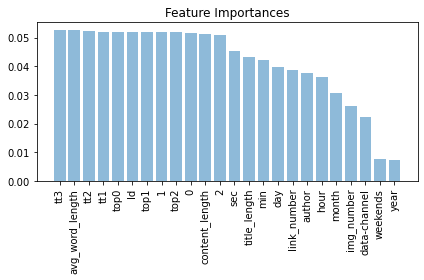

TOP 3 Fetures: tt3, avg_word_length, tt2


In [16]:
importance_plot(df_X, df_y)

In [8]:
df_X.columns

Index(['data-channel', 'content_length', 'avg_word_length', 'topics', 'author',
       'year', 'month', 'day', 'hour', 'min', 'sec', 'weekends', 'img_number',
       'link_number', 'title_length', 'a', 'b', 'c', '0', '1', '2'],
      dtype='object')

In [55]:
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

forest = RandomForestClassifier(n_estimators=500, random_state=42, n_jobs=-2, verbose=0)

cv = model_selection.KFold(n_splits=5, shuffle=True, random_state=42)

accuracy_list=[]
for train_index, test_index in cv.split(df_X.values, df_y.values):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_val = df_X.values[train_index], df_X.values[test_index]
    y_train, y_val = df_y.values[train_index], df_y.values[test_index]

    # For training, fit() is used
    forest.fit(X_train, y_train)

    # For other metrics, we need the predictions of the model
    y_pred = forest.predict(X_val)
    
    print(accuracy_score(y_val, y_pred))
    accuracy_list.append(accuracy_score(y_val, y_pred))

TRAIN: [    0     1     2 ... 27637 27639 27641] TEST: [    3     6    17 ... 27638 27640 27642]
0.5628504250316513
TRAIN: [    1     2     3 ... 27640 27641 27642] TEST: [    0     7    19 ... 27607 27611 27626]


KeyboardInterrupt: 

In [52]:
print(np.mean(accuracy_list))

0.5637955927161062


In [49]:
df_X_drop = df_X[['weekends', 'month','link_number','title_length','top0','tt2']] #,'month'

In [50]:
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

forest = RandomForestClassifier(n_estimators=1000, random_state=42, n_jobs=-1, verbose=0)

cv = model_selection.KFold(n_splits=5, shuffle=True, random_state=42)

accuracy_list=[]
for train_index, test_index in cv.split(df_X_drop.values, df_y.values):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_val = df_X_drop.values[train_index], df_X_drop.values[test_index]
    y_train, y_val = df_y.values[train_index], df_y.values[test_index]

    # For training, fit() is used
    forest.fit(X_train, y_train)

    # For other metrics, we need the predictions of the model
    y_pred = forest.predict(X_val)
    
    print(accuracy_score(y_val, y_pred))
    accuracy_list.append(accuracy_score(y_val, y_pred))

TRAIN: [    0     1     2 ... 27637 27639 27641] TEST: [    3     6    17 ... 27638 27640 27642]
0.5217941761620546
TRAIN: [    1     2     3 ... 27640 27641 27642] TEST: [    0     7    19 ... 27607 27611 27626]
0.5384337131488515
TRAIN: [    0     1     2 ... 27640 27641 27642] TEST: [    4     5     8 ... 27630 27634 27637]
0.5313799963827094
TRAIN: [    0     3     4 ... 27640 27641 27642] TEST: [    1     2    10 ... 27623 27635 27636]
0.5235166425470333
TRAIN: [    0     1     2 ... 27638 27640 27642] TEST: [    9    11    13 ... 27632 27639 27641]
0.5365412445730825


In [10]:
time_feat = ['year', 'month', 'day', 'hour', 'min', 'sec']

In [19]:
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

from itertools import combinations
perms = combinations(time_feat,4)

forest = RandomForestClassifier(n_estimators=1000, random_state=42, n_jobs=-2, verbose=0)

cv = model_selection.KFold(n_splits=5, shuffle=True, random_state=42)

perms_list=[]
for perm in perms:
    df_X_drop = df_X.drop(columns=[_ for _ in perm])
    
    accuracy_list=[]
    for train_index, test_index in cv.split(df_X_drop.values, df_y.values):
        print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_val = df_X_drop.values[train_index], df_X_drop.values[test_index]
        y_train, y_val = df_y.values[train_index], df_y.values[test_index]

        # For training, fit() is used
        forest.fit(X_train, y_train)

        # For other metrics, we need the predictions of the model
        y_pred = forest.predict(X_val)

        accuracy_list.append(accuracy_score(y_val, y_pred))
    perms_list.append((np.mean(accuracy_list),perm))
    print('CV Accuracy: %.5f  Dropped time_feat: %s'% (np.mean(accuracy_list),perm))

TRAIN: [    0     1     2 ... 24947 24948 24949] TEST: [   17    29    30 ... 24935 24936 24938]
TRAIN: [    1     2     5 ... 24946 24948 24949] TEST: [    0     3     4 ... 24940 24942 24947]
TRAIN: [    0     1     2 ... 24946 24947 24948] TEST: [    5     7     8 ... 24944 24945 24949]
TRAIN: [    0     3     4 ... 24947 24948 24949] TEST: [    1     2    10 ... 24923 24937 24941]
TRAIN: [    0     1     2 ... 24945 24947 24949] TEST: [    9    11    13 ... 24939 24946 24948]
CV Accuracy: 0.54000  Dropped time_feat: ('year', 'month', 'day', 'hour')
TRAIN: [    0     1     2 ... 24947 24948 24949] TEST: [   17    29    30 ... 24935 24936 24938]
TRAIN: [    1     2     5 ... 24946 24948 24949] TEST: [    0     3     4 ... 24940 24942 24947]
TRAIN: [    0     1     2 ... 24946 24947 24948] TEST: [    5     7     8 ... 24944 24945 24949]
TRAIN: [    0     3     4 ... 24947 24948 24949] TEST: [    1     2    10 ... 24923 24937 24941]
TRAIN: [    0     1     2 ... 24945 24947 24949] TEST

TRAIN: [    0     1     2 ... 24945 24947 24949] TEST: [    9    11    13 ... 24939 24946 24948]
CV Accuracy: 0.55507  Dropped time_feat: ('day', 'hour', 'min', 'sec')


In [20]:
from itertools import combinations
perms = combinations(time_feat,4)
for perm in perms:
    print(perm)

('year', 'month', 'day', 'hour')
('year', 'month', 'day', 'min')
('year', 'month', 'day', 'sec')
('year', 'month', 'hour', 'min')
('year', 'month', 'hour', 'sec')
('year', 'month', 'min', 'sec')
('year', 'day', 'hour', 'min')
('year', 'day', 'hour', 'sec')
('year', 'day', 'min', 'sec')
('year', 'hour', 'min', 'sec')
('month', 'day', 'hour', 'min')
('month', 'day', 'hour', 'sec')
('month', 'day', 'min', 'sec')
('month', 'hour', 'min', 'sec')
('day', 'hour', 'min', 'sec')


In [79]:
from sklearn.linear_model import RidgeClassifierCV
rc_cv = RidgeClassifierCV(alphas=[50],cv=5)
rc_cv.fit(df_X.values, df_y.values)
rc_cv.score(df_X.values, df_y.values)

0.5556198675975835

In [97]:
from sklearn.linear_model import LogisticRegression
lc = LogisticRegression(C=0.1, n_jobs=1, penalty='l1',solver='liblinear')
lc.fit(df_X.values, df_y.values)
lc.score(df_X.values, df_y.values)

0.5550772347429729

In [98]:
from sklearn.linear_model import RidgeClassifier
rc = RidgeClassifier(alpha=0.1,solver='sparse_cg')
rc.fit(df_X.values, df_y.values)
rc.score(df_X.values, df_y.values)

0.553847266939189

In [99]:
from sklearn.model_selection import cross_val_score
from itertools import permutations
from sklearn.ensemble import VotingClassifier

best_vt, best_w, best_acc = None, (), -1
for a, b, c in list(permutations(range(1,4),3)): # try some weight combination
    voting_clf = VotingClassifier(estimators=[('forest',forest),('rc',rc),('lc',lc)], voting='hard', weights=[a,b,c])
    acc = cross_val_score(estimator=voting_clf, X=df_X.values, y=df_y.values, cv=5, scoring='accuracy')
    
    print('%s: %.5f (+/- %.4f)' % ((a,b,c), acc.mean(), acc.std()))
    if best_acc < acc.mean():
        best_vt, best_w, best_score = voting_clf, (a, b,c), acc.mean()
        
print('\nBest %s: %.5f' % (best_w, best_score))

(1, 2, 3): 0.55254 (+/- 0.0077)
(1, 3, 2): 0.55414 (+/- 0.0071)
(2, 1, 3): 0.55254 (+/- 0.0077)
(2, 3, 1): 0.55414 (+/- 0.0071)
(3, 1, 2): 0.56611 (+/- 0.0069)
(3, 2, 1): 0.56611 (+/- 0.0069)

Best (3, 2, 1): -1.00000


In [109]:
voting_clf = VotingClassifier(estimators=[('forest',forest),('rc',rc),('lc',lc)], voting='hard', weights=[3,2,1])
acc = cross_val_score(estimator=voting_clf, X=df_X.values, y=df_y.values, cv=5, scoring='accuracy')

print('%s: %.5f (+/- %.4f)' % ((3,2,1), acc.mean(), acc.std()))

(3, 2, 1): 0.56611 (+/- 0.0069)


In [115]:
preprocessed_test = pd.read_csv('test/preprocessed_test.csv')
topics_t_test = pd.read_csv('test/topic_tfidf_tsne_test.csv')
df_tt_test = pd.read_csv('test/title_tfidf_tsne_test.csv')
df_ct_test = pd.read_csv('test/content_tfidf_tsne_test.csv')

In [116]:
preprocessed_test[['top0','top1','top2']] = topics_t_test[['top0','top1','top2']]
df_all_test = pd.concat([preprocessed_test, df_tt_test, df_ct_test], axis=1)
df_X_test = df_all_test.drop(columns=['index', 'Id', 'Page content', 'title', 'raw_content','topics'])

In [117]:
df_X_test

,data-channel,content_length,avg_word_length,author,year,month,day,hour,min,sec,...,title_length,top0,top1,top2,tt0,tt1,tt2,0,1,2
0,5,622,5.220114,243,2013,9,9,19,47,2,...,74,6.816614,-12.908992,-9.823444,16.643034,-29.885660,-37.205980,25.453863,-13.738965,9.917775
1,25,149,4.739437,263,2013,10,31,9,25,2,...,36,17.831564,8.411661,-20.731312,-7.531660,10.034243,-43.818336,-7.649108,15.919584,-16.818075
2,2,168,5.018293,278,2013,6,25,12,54,54,...,46,-6.013624,-17.264320,-1.371369,-14.594997,-19.404720,47.199028,16.951826,4.232488,-4.475815
3,6,162,5.581699,211,2013,2,13,3,30,21,...,40,-5.639806,-7.274945,-14.487558,-4.278851,29.432812,27.236320,-0.467867,-20.695152,-4.905631
4,5,225,5.041096,142,2014,10,3,1,34,54,...,70,-2.400199,-6.273100,-10.682630,23.818120,-0.059462,-49.796720,-1.435363,-20.496859,5.278312
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11842,25,132,4.869919,184,2013,2,9,21,0,44,...,57,-13.622000,-1.237494,0.043808,-21.629366,-42.947340,-0.746960,-22.297750,0.470062,-17.739042
11843,8,575,4.584071,62,2013,4,18,19,3,24,...,53,2.437301,24.756586,-5.888004,-8.250163,-51.949707,26.182446,13.921059,5.931064,19.281730
11844,18,1204,5.254882,49,2014,1,22,23,38,44,...,59,2.191630,-25.755600,-11.615255,27.052912,-26.366764,-25.327444,22.581470,-13.518455,8.818394
11845,25,136,4.684615,263,2013,8,28,8,37,13,...,53,-14.641076,6.706494,15.992154,16.324444,-28.763903,15.209282,-2.523557,26.937930,-1.304909


In [119]:
voting_clf.fit(df_X, df_y)

VotingClassifier(estimators=[('forest',
                              RandomForestClassifier(n_estimators=500,
                                                     n_jobs=-2,
                                                     random_state=42)),
                             ('rc',
                              RidgeClassifier(alpha=0.1, solver='sparse_cg')),
                             ('lc',
                              LogisticRegression(C=0.1, n_jobs=1, penalty='l1',
                                                 solver='liblinear'))],
                 weights=[3, 2, 1])

In [125]:
voting_pred = voting_clf.predict(df_X_test)

In [128]:
voting_pred

-1

In [129]:
voting_pred = [ 0 if _==-1 else 1 for _ in voting_pred]

In [140]:
df_voting = pd.DataFrame(data= voting_pred, columns=['Popularity'])

In [141]:
df_voting['Id'] = df_all_test['Id'].values

In [144]:
df_voting.to_csv('voting_predict.csv', index=False)